In [ ]:
pip install shaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.1 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import shap

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
diabetes = pd.read_csv('diabetic_data.csv') 

Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
pd.set_option('max.columns',None)

In [ ]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
for col in diabetes.columns:
  #print('--------------------------------------------------','\n')
  print(col,'\n')
  print(diabetes[col].value_counts(),'\n')
  print('--------------------------------------------------','\n')

encounter_id 

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64 

-------------------------------------------------- 

patient_nbr 

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64 

-------------------------------------------------- 

race 

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64 

-------------------------------------------------- 

gender 

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64 

-------------------------------------------------- 

age 

[70-80)     260

In [ ]:
## Checking missing Values
for col in diabetes.columns:
  if '?' in diabetes[col].unique():
    print('-----------------------------------------------------------')
    print("Percentage of missing values in: ",col,'\n')
    print(len(diabetes.loc[diabetes[col]=='?'])/len(diabetes)*100,'\n')

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


-----------------------------------------------------------
Percentage of missing values in:  race 

2.2335554114340743 

-----------------------------------------------------------
Percentage of missing values in:  weight 

96.85847925633315 

-----------------------------------------------------------
Percentage of missing values in:  payer_code 

39.5574160328597 

-----------------------------------------------------------
Percentage of missing values in:  medical_specialty 

49.08220820313268 

-----------------------------------------------------------
Percentage of missing values in:  diag_1 

0.02063557573256294 

-----------------------------------------------------------
Percentage of missing values in:  diag_2 

0.3517874339170253 

-----------------------------------------------------------
Percentage of missing values in:  diag_3 

1.398305917497003 



In [ ]:
diabetes.drop(['weight','payer_code','medical_specialty'], axis = 1, inplace = True)

In [ ]:
## We will just predict readmission
diabetes.loc[(diabetes['readmitted']=='NO'),'readmission'] = '0'
diabetes.loc[(diabetes['readmitted']=='<30'),'readmission'] = '1'
diabetes.loc[(diabetes['readmitted']=='>30'),'readmission'] = '0'
## Visualization

In [ ]:
diabetes = diabetes.drop_duplicates(subset= ['patient_nbr'], keep = 'last')

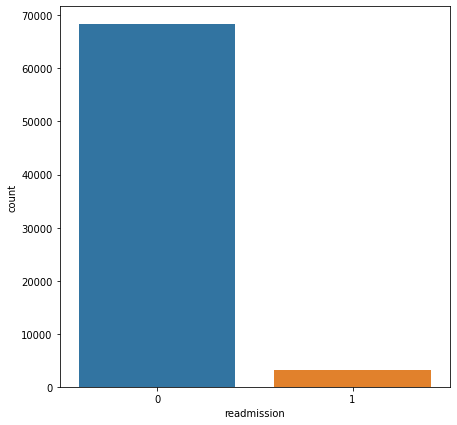

In [ ]:
## Looking at how many people were readmitted

readmission  = diabetes.groupby('readmission').count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (7,7))

sns.barplot(data = readmission, x = readmission['readmission'], y = readmission['count'])
plt.show()

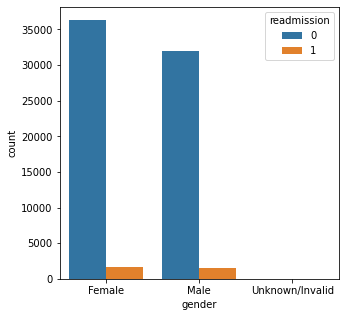

In [ ]:
## Looking at readmission rates according to gender

gender  = diabetes.groupby(['readmission','gender']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (5,5))

sns.barplot(data = gender, x = gender['gender'], y = gender['count'], hue = gender['readmission'])
plt.show()

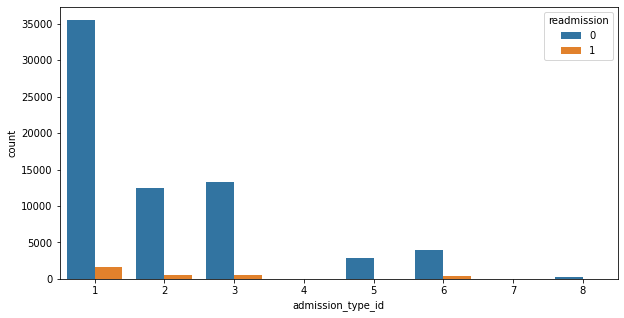

In [ ]:
## Looking at readmission rates according to gender

admission_type  = diabetes.groupby(['readmission','admission_type_id']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (10,5))

sns.barplot(data = admission_type, x = admission_type['admission_type_id'], y = admission_type['count'], hue = admission_type['readmission'])
plt.show()

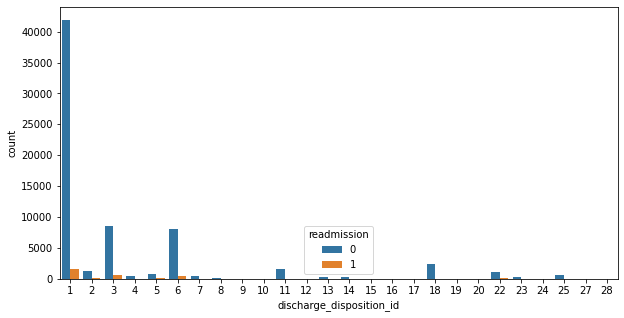

In [ ]:
## Looking at readmission rates according to gender

discharge_disposition  = diabetes.groupby(['readmission','discharge_disposition_id']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (10,5))

sns.barplot(data = discharge_disposition, x = discharge_disposition['discharge_disposition_id'], y = discharge_disposition['count'], hue = discharge_disposition['readmission'])
plt.show()

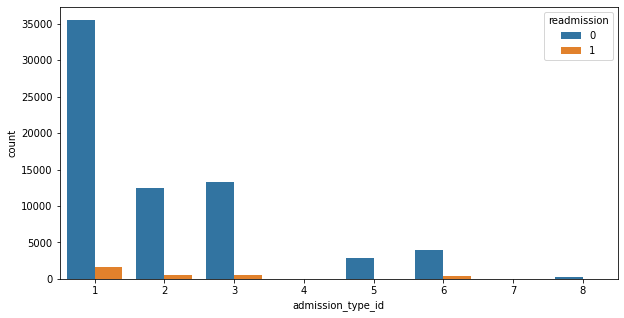

In [ ]:
## Looking at readmission rates according to gender

admission_type  = diabetes.groupby(['readmission','admission_type_id']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (10,5))

sns.barplot(data = admission_type, x = admission_type['admission_type_id'], y = admission_type['count'], hue = admission_type['readmission'])
plt.show()

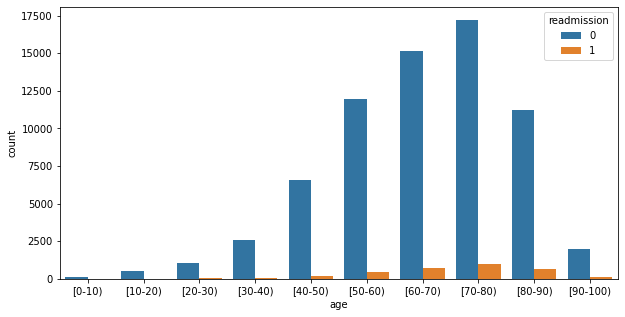

In [ ]:
## Looking at readmission rates according to gender

age  = diabetes.groupby(['readmission','age']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (10,5))

sns.barplot(data = age, x = age['age'], y = age['count'], hue = age['readmission'])
plt.show()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

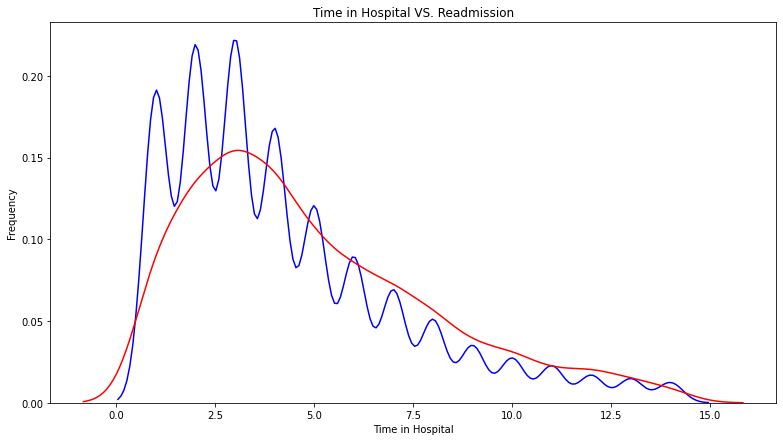

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(diabetes.loc[(diabetes['readmission'] == '0'),'time_in_hospital'] , color='b',shade=False,label='Not Readmitted')
ax=sns.kdeplot(diabetes.loc[(diabetes['readmission'] == '1'),'time_in_hospital'] , color='r',shade=False, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

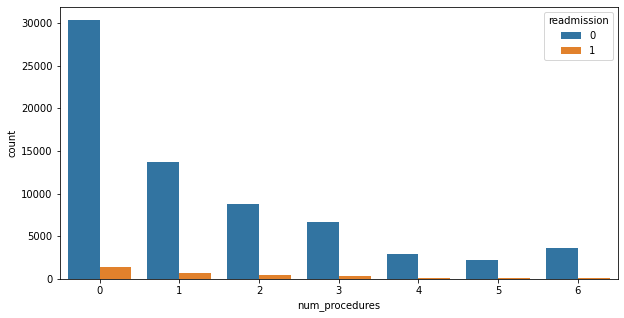

In [ ]:
##

num_procedures  = diabetes.groupby(['readmission','num_procedures']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (10,5))

sns.barplot(data = num_procedures, x = num_procedures['num_procedures'], y = num_procedures['count'], hue = num_procedures['readmission'])
plt.show()

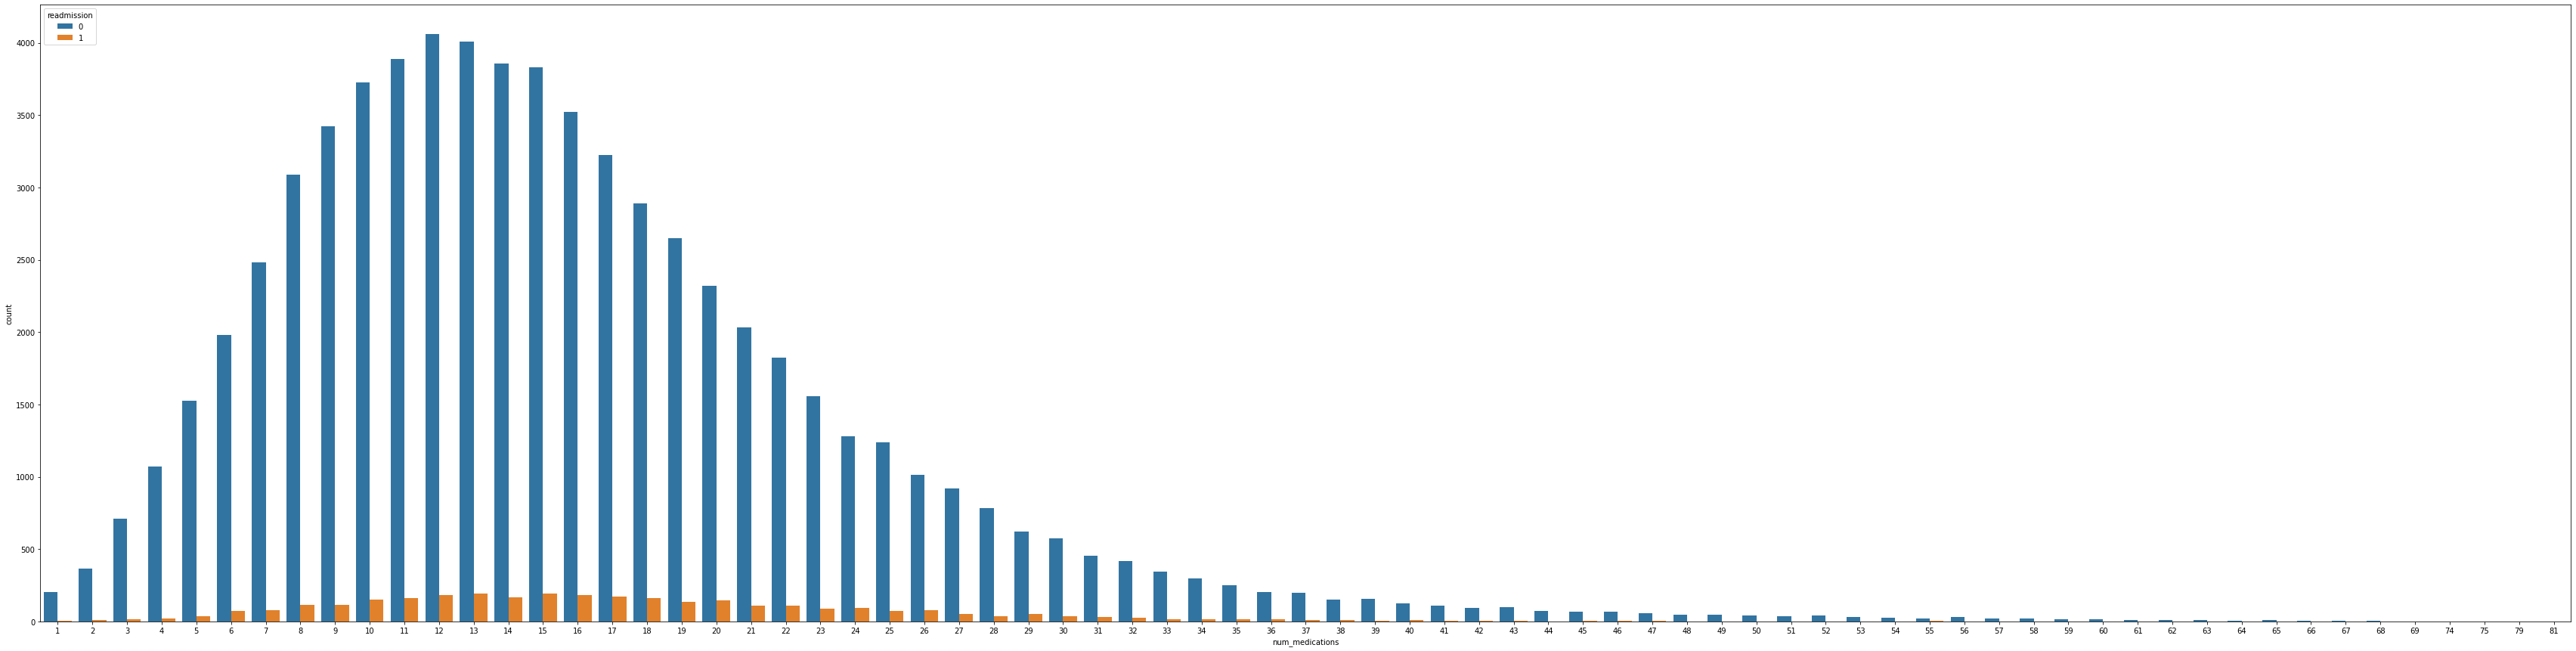

In [ ]:
##

num_medications  = diabetes.groupby(['readmission','num_medications']).count()['encounter_id'].reset_index().rename(columns = {'encounter_id':'count'})

plt.figure(figsize = (60,15))

sns.barplot(data = num_medications, x = num_medications['num_medications'], y = num_medications['count'], hue = num_medications['readmission'])
plt.show()

In [ ]:
## Looking at readmission rates according to gender
num_medications.describe()

,num_medications,count
count,130.000000,130.000000
mean,33.815385,550.138462
std,20.198543,1072.402893
min,1.000000,1.000000
25%,17.000000,10.250000
50%,33.000000,68.000000
75%,49.000000,286.250000
max,81.000000,4059.000000


In [ ]:
# keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
# for col in keys:
#     colname = str(col) + 'temp'
#     diabetes[colname] = diabetes[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
# diabetes['numchange'] = 0
# for col in keys:
#     colname = str(col) + 'temp'
#     diabetes['numchange'] = diabetes['numchange'] + diabetes[colname]
#     del diabetes[colname]
    
# diabetes['numchange'].value_counts() 

0    74063
1    26272
2     1318
3      108
4        5
Name: numchange, dtype: int64

In [ ]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = diabetes.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.059323,0.129486,-0.008185,-0.129183,0.148275,0.097647,0.022923,-0.023517,-0.016662,-0.123925
discharge_disposition_id,0.059323,1.000000,0.016539,0.174016,0.027927,0.016816,0.117447,-0.007369,-0.013323,0.042155,0.061409
admission_source_id,0.129486,0.016539,1.000000,0.001295,0.087010,-0.127889,-0.056236,0.022807,0.058895,0.032073,0.082849
time_in_hospital,-0.008185,0.174016,0.001295,1.000000,0.328744,0.174628,0.462751,-0.009112,-0.001589,0.091504,0.225227
num_lab_procedures,-0.129183,0.027927,0.087010,0.328744,1.000000,0.046903,0.261224,-0.010700,0.014487,0.052392,0.158779
num_procedures,0.148275,0.016816,-0.127889,0.174628,0.046903,1.000000,0.396664,-0.019226,-0.042465,-0.054913,0.077104
num_medications,0.097647,0.117447,-0.056236,0.462751,0.261224,0.396664,1.000000,0.035710,0.011343,0.061143,0.259514
number_outpatient,0.022923,-0.007369,0.022807,-0.009112,-0.010700,-0.019226,0.035710,1.000000,0.092064,0.089687,0.091668
number_emergency,-0.023517,-0.013323,0.058895,-0.001589,0.014487,-0.042465,0.011343,0.092064,1.000000,0.200874,0.061990
number_inpatient,-0.016662,0.042155,0.032073,0.091504,0.052392,-0.054913,0.061143,0.089687,0.200874,1.000000,0.114281


In [ ]:
### Creating groups based on Diagnosis primary Codes (ICD)
## There are 0.02% missing values
diabetes.loc[diabetes['diag_1']=='?','diag_1'] = np.nan
diabetes.loc[diabetes['diag_2']=='?','diag_2'] = np.nan
diabetes.loc[diabetes['diag_2']=='?','diag_3'] = np.nan
diabetes['diagnosis'] = diabetes['diag_1'].combine_first(diabetes['diag_2']).combine_first(diabetes['diag_3'])
diabetes['diagnosis'] = diabetes['diagnosis'].apply(lambda x: x[:3])
print(len(diabetes.loc[diabetes['diagnosis']=='?'])/len(diabetes)*100,'\n')

0.0013982493917615146 



In [ ]:
diabetes['diagnosis'].unique()

array(['250', '276', '648', '8', '197', '414', '428', '398', '434', '157',
       '518', '999', '410', '682', '402', '737', '572', 'V57', '189',
       '786', '427', '584', '462', '174', '998', '996', '511', '432',
       '626', '295', '618', '182', '845', '423', '808', '722', '403',
       '784', '707', '440', '151', '715', '997', '198', '564', '812',
       '590', '556', '486', '411', '578', '433', 'V58', '569', '185',
       '536', '255', '599', '558', '574', '491', '560', '244', '730',
       '188', '824', '332', '562', '296', '510', '70', '642', '625',
       '571', '593', '456', '446', '820', '515', '780', '38', '577',
       '995', '235', '196', '721', '162', '724', '401', 'V55', '281',
       '466', '530', '789', '566', '822', '277', '711', '575', '202',
       '493', '280', '553', '441', '349', '557', '962', '507', '386',
       '156', '200', '728', '348', '459', '435', '426', '388', '337',
       '82', '225', '596', '288', '656', '787', '492', '220', '516',
       '210', '922

In [ ]:
# Circulatory Codes
Circulatory = [str(i) for i in range(390,460)]
Circulatory.append('785')

# Respiratory Codes
Respiratory = [str(i) for i in range(460,520)]
Respiratory.append('786')

# Digestive Codes
Digestive = [str(i) for i in range(520,580)]
Digestive.append('787')

# Digestive Codes
Diabetes = ['250']

# Injury Codes
Injury = [str(i) for i in range(800,1000)]
Injury.append('787')

# Muskuloskeletal Codes
Muskuloskeletal = [str(i) for i in range(710,740)]

# Genitourinary  Codes
Genitourinary  = [str(i) for i in range(580,629)]
Genitourinary .append('788')

# Neoplasms  Codes
Neoplasms  = [str(i) for i in range(140,239)]
Neoplasms.append('788')

# Ill Defined Conditions  Codes
ill_defined  = [str(i) for i in range(790,800)]
ill_defined.extend(['780','781','784'])

# Endocrine/Nutritional/Metabolic conditions (non-diabetic) Codes
endocrine  = [str(i) for i in range(240,280)]
endocrine.remove('250')

# Skin Conditions  Codes
Skin  = [str(i) for i in range(680,710)]
Skin.append(['782'])

### Infectious Conditions  Codes
Infectious  = [str(i) for i in range(1,140)]

# Mental  Codes
Mental  = [str(i) for i in range(290,320)]

# External Injuries
External = ['E','V']


# Blood Conditions  Codes
Blood  = [str(i) for i in range(280,290)]

# Nervous System Conditions  Codes
Nervous_System  = [str(i) for i in range(320,360)]

# Pregnancy Conditions  Codes
Pregnancy  = [str(i) for i in range(630,680)]

# Sense Organ Conditions  Codes
Sense  = [str(i) for i in range(360,390)]

# Congenital Anomalies  Codes
Congenital  = [str(i) for i in range(740,760)]

In [ ]:
diabetes['diagnosis'].apply(lambda x:x[0]).unique()

array(['2', '6', '8', '1', '4', '3', '5', '9', '7', 'V', 'E', '?'],
      dtype=object)

In [ ]:
diabetes.loc[diabetes['diagnosis'].isin(Circulatory),'diagnosis_category'] = 'Circulatory Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Respiratory),'diagnosis_category'] = 'Respiratory Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Digestive),'diagnosis_category'] = 'Digestive Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Diabetes),'diagnosis_category'] = 'Diabetes Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Muskuloskeletal),'diagnosis_category'] = 'Muskuloskeletal Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Genitourinary),'diagnosis_category'] = 'Genitourinary Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Neoplasms),'diagnosis_category'] = 'Injury Conditions'
diabetes.loc[diabetes['diagnosis'].isin(ill_defined),'diagnosis_category'] = 'ill_defined Conditions'
diabetes.loc[diabetes['diagnosis'].isin(endocrine),'diagnosis_category'] = 'endocrine Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Infectious),'diagnosis_category'] = 'Infectious Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Skin),'diagnosis_category'] = 'Skin Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Mental),'diagnosis_category'] = 'Mental Conditions'
diabetes.loc[diabetes['diagnosis'].isin(External),'diagnosis_category'] = 'External Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Blood),'diagnosis_category'] = 'Blood Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Nervous_System),'diagnosis_category'] = 'Nervous System Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Pregnancy),'diagnosis_category'] = 'Pregnancy Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Sense),'diagnosis_category'] = 'Sense Organ Conditions'
diabetes.loc[diabetes['diagnosis'].isin(Congenital),'diagnosis_category'] = 'Congenital Conditions'

In [ ]:
diabetes['diagnosis_category'].value_counts()

Circulatory Conditions        21351
Respiratory Conditions         9873
Digestive Conditions           6600
Diabetes Conditions            5692
Muskuloskeletal Conditions     3894
Genitourinary Conditions       3605
Injury Conditions              2731
Infectious Conditions          1937
endocrine Conditions           1876
ill_defined Conditions         1792
Skin Conditions                1728
Mental Conditions              1582
Blood Conditions                697
Nervous System Conditions       678
Pregnancy Conditions            586
Sense Organ Conditions          197
Congenital Conditions            41
Name: diagnosis_category, dtype: int64

In [ ]:
diabetes["Hospital Visits"] = diabetes['number_emergency'] + diabetes['number_inpatient'] + diabetes['number_outpatient']

In [ ]:
### Combining Discharge Disposition IDs

diabetes.loc[diabetes['discharge_disposition_id'].isin([1,2,3,4,5,6,8,10,15,16,17,22,23,24,30,27,28,29]),'discharge_disposition_id_comb'] = 'Discharged/Transferred'
diabetes.loc[diabetes['discharge_disposition_id'].isin([13,14]),'discharge_disposition_id_comb'] = 'Hospice'
diabetes.loc[diabetes['discharge_disposition_id'].isin([11,19,20,21]),'discharge_disposition_id_comb'] = 'Expired'
diabetes.loc[diabetes['discharge_disposition_id'].isin([18,25,26]),'discharge_disposition_id_comb'] = 'NULL'

diabetes.loc[diabetes['discharge_disposition_id'].isin([7]),'discharge_disposition_id_comb'] = 'Left AMA'
diabetes.loc[diabetes['discharge_disposition_id'].isin([12]),'discharge_disposition_id_comb'] = 'Still a Patient'
diabetes.loc[diabetes['discharge_disposition_id'].isin([9]),'discharge_disposition_id_comb'] = 'Inpatient'

In [ ]:
diabetes = diabetes[diabetes['discharge_disposition_id_comb'] != 'Expired']

In [ ]:
diabetes[['discharge_disposition_id','discharge_disposition_id_comb']].drop_duplicates()

,discharge_disposition_id,discharge_disposition_id_comb
0,25,NULL
1,1,Discharged/Transferred
9,3,Discharged/Transferred
13,6,Discharged/Transferred
29,2,Discharged/Transferred
31,5,Discharged/Transferred
487,10,Discharged/Transferred
1051,7,Left AMA
1086,14,Hospice
1262,4,Discharged/Transferred


In [ ]:
### Combining Admission IDs
diabetes.loc[diabetes['admission_type_id'].isin([1,2]),'admission_type_id_comb'] = 'Emergency/Urgent'
diabetes.loc[diabetes['admission_type_id'].isin([5,6,8]),'admission_type_id_comb'] = 'Null'
diabetes.loc[diabetes['admission_type_id'].isin([3]),'admission_type_id_comb'] = 'Elective'
diabetes.loc[diabetes['admission_type_id'].isin([4]),'admission_type_id_comb'] = 'Newborn'
diabetes.loc[diabetes['admission_type_id'].isin([7]),'admission_type_id_comb'] = 'Trauma Center'

In [ ]:
diabetes[['admission_type_id','admission_type_id_comb']].drop_duplicates()

,admission_type_id,admission_type_id_comb
0,6,Null
1,1,Emergency/Urgent
5,2,Emergency/Urgent
6,3,Elective
2043,4,Newborn
3148,5,Null
7789,8,Null
45829,7,Trauma Center


In [ ]:
### 
diabetes.loc[diabetes['admission_source_id'].isin([1,2,3]),'admission_source_id_comb'] = 'Referral'
diabetes.loc[diabetes['admission_source_id'].isin([4,5,6,10,22,25,26]),'admission_source_id_comb'] = 'Transfer'
diabetes.loc[diabetes['admission_source_id'].isin([7]),'admission_source_id_comb'] = 'Emergency Room'
diabetes.loc[diabetes['admission_source_id'].isin([8]),'admission_source_id_comb'] = 'Court/Law Enforcement'
diabetes.loc[diabetes['admission_source_id'].isin([11,12,13,14,23,24]),'admission_source_id_comb'] = 'Birth Related'
diabetes.loc[diabetes['admission_source_id'].isin([9,15,17,20,21]),'admission_source_id_comb'] = 'Elective'

In [ ]:
diabetes[['admission_source_id','admission_source_id_comb']].drop_duplicates()

,admission_source_id,admission_source_id_comb
0,1,Referral
1,7,Emergency Room
5,2,Referral
8,4,Transfer
469,20,Elective
548,6,Transfer
598,5,Transfer
1014,3,Referral
1079,17,Elective
5752,8,Court/Law Enforcement


In [ ]:
feat_cols = ['discharge_disposition_id','admission_type_id','admission_source_id']
diabetes = diabetes.drop(feat_cols, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(diabetes.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmission', 'numchange', 'diagnosis', 'diagnosis_category',
       'Hospital Visits', 'discharge_disposition_id_comb',
       'admission_type_id_comb', 'admission_source_id_comb'],
      dtype='object')


In [ ]:
diabetes = diabetes.drop('diag_1', axis=1)
diabetes = diabetes.drop('diag_2', axis=1)
diabetes = diabetes.drop('diag_3', axis=1)
missing_race = diabetes.loc[diabetes['race']=='?'].index.values
diabetes = diabetes.drop(missing_race,axis = 0)
# diabetes = diabetes.loc[:, diabetes.columns != "Diag 2"]
# diabetes = diabetes.loc[:, diabetes.columns != "Diag 3"]


In [ ]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmission,diagnosis,diagnosis_category,Hospital Visits,discharge_disposition_id_comb,admission_type_id_comb,admission_source_id_comb
0,2278392,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,250,Diabetes Conditions,0,NULL,Null,Referral
1,149190,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,276,endocrine Conditions,0,Discharged/Transferred,Emergency/Urgent,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,648,Pregnancy Conditions,3,Discharged/Transferred,Emergency/Urgent,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,8,Infectious Conditions,0,Discharged/Transferred,Emergency/Urgent,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,197,Injury Conditions,0,Discharged/Transferred,Emergency/Urgent,Emergency Room


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   encounter_id                   99493 non-null  int64 
 1   patient_nbr                    99493 non-null  int64 
 2   race                           99493 non-null  object
 3   gender                         99493 non-null  object
 4   age                            99493 non-null  object
 5   time_in_hospital               99493 non-null  int64 
 6   num_lab_procedures             99493 non-null  int64 
 7   num_procedures                 99493 non-null  int64 
 8   num_medications                99493 non-null  int64 
 9   number_outpatient              99493 non-null  int64 
 10  number_emergency               99493 non-null  int64 
 11  number_inpatient               99493 non-null  int64 
 12  number_diagnoses               99493 non-null  int64 
 13  

In [ ]:
# #medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',\
# #               'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone',\
# #               'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
# #'sitagliptin',	

# medications = ['metformin',	'repaglinide',	'nateglinide',	'chlorpropamide','glimepiride',	'acetohexamide',	'glipizide',	'glyburide',	'tolbutamide',	'pioglitazone',\
#                'rosiglitazone',	'acarbose',	'miglitol',	'troglitazone',	'tolazamide',	'examide',	'insulin','glyburide-metformin',	'glipizide-metformin',\
#                'glimepiride-pioglitazone','metformin-rosiglitazone',	'metformin-pioglitazone','citoglipton']

# diabetes = diabetes.drop(medications, axis=1)


In [ ]:
unwanted_cols = ['encounter_id','patient_nbr','diagnosis','max_glu_serum','readmitted','change','citoglipton','metformin-rosiglitazone','examide','number_outpatient','number_emergency','number_inpatient']
diabetes = diabetes.drop(unwanted_cols, axis=1)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

cols = diabetes.select_dtypes(include=numerics).columns

In [ ]:
standard_deviations = 3
diabetes = diabetes[diabetes[cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
    .all(axis=1)]


In [ ]:
diabetes.shape
#diabetes[diabetes['time_in_hospital']==3120]

(64987, 36)

In [ ]:
one_hot_encoded_data = pd.get_dummies(diabetes, columns = ['race', 'gender','age','admission_source_id_comb','diagnosis_category','diabetesMed','admission_type_id_comb',\
                                                           'discharge_disposition_id_comb','A1Cresult',
                                                           'metformin',	'repaglinide',	'nateglinide',	'chlorpropamide','glimepiride',	'acetohexamide',	'glipizide',\
                                                           'glyburide',	'tolbutamide',	'pioglitazone',\
               'rosiglitazone',	'acarbose',	'miglitol',	'troglitazone',	'tolazamide',	'insulin','glyburide-metformin',	'glipizide-metformin',\
               'glimepiride-pioglitazone',	'metformin-pioglitazone'])


In [ ]:
one_hot_encoded_data_dummy = one_hot_encoded_data.drop(['race_AfricanAmerican','gender_Unknown/Invalid','age_[20-30)','admission_type_id_comb_Null','diagnosis_category_Blood Conditions',\
                                                        'diabetesMed_No','admission_source_id_comb_Court/Law Enforcement','discharge_disposition_id_comb_NULL','A1Cresult_None',
                                                        'metformin-pioglitazone_No','glimepiride-pioglitazone_No','glipizide-metformin_No',
                                                        'glyburide-metformin_No','insulin_No','tolazamide_No','troglitazone_No','miglitol_No',
                                                        'acarbose_No','rosiglitazone_No','pioglitazone_No','tolbutamide_No','glyburide_No',
                                                        'glipizide_No','acetohexamide_No','glimepiride_No','chlorpropamide_No','nateglinide_No',
                                                        'repaglinide_No','metformin_No','A1Cresult_None'],axis = 1)

In [ ]:
X = one_hot_encoded_data_dummy.drop('readmission',axis = 1)

Y = one_hot_encoded_data_dummy['readmission'].astype(int)


### Need to delete dummy vars


In [ ]:
import random
random.seed(69)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

In [ ]:
diabetes['readmission'].value_counts()

0    62058
1     2929
Name: readmission, dtype: int64

In [ ]:
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train_sc,y_train)

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_smote,y_smote)

LogisticRegression(max_iter=1000)

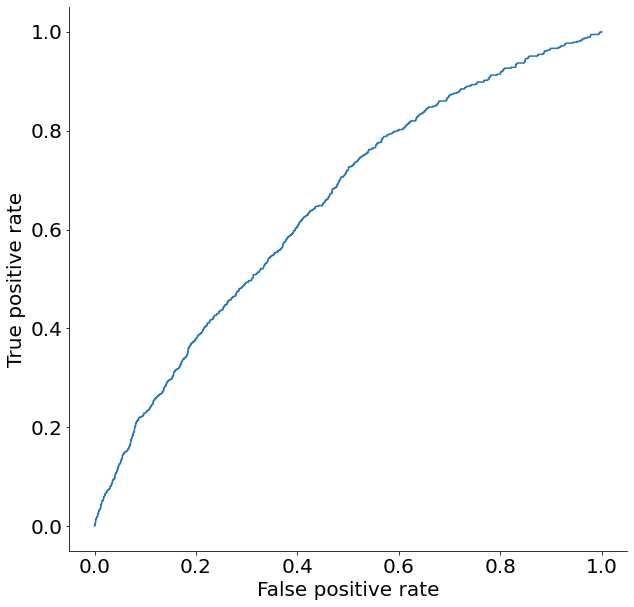

In [ ]:
from sklearn.metrics import roc_curve
lr_prob = lr.predict_proba(x_test_sc)[:,1]

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, lr_prob, pos_label=1)


# roc curve 
plt.figure(figsize=(10, 10))
plt.plot(fpr_lr,tpr_lr)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

In [ ]:
lr_prd = np.where(lr.predict_proba(x_test_sc)[:,1]>=thresh_lr[np.argmax(tpr_lr-fpr_lr)],1,0)
#lr.predict(pd.DataFrame(x_test_sc))
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(lr_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,732,815,1547
1,37,31,68
All,769,846,1615


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, lr_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, lr_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, lr_prd)))
print("F1-score is {0:.2f}".format(f1_score(y_test, lr_prd)))
print("ROC/AUC is {0:.2f}".format(roc_auc_score(y_test, lr_prd)))

Accuracy is 0.51
Precision is 0.06
Recall is 0.73
F1-score is 0.12
ROC/AUC is 0.61


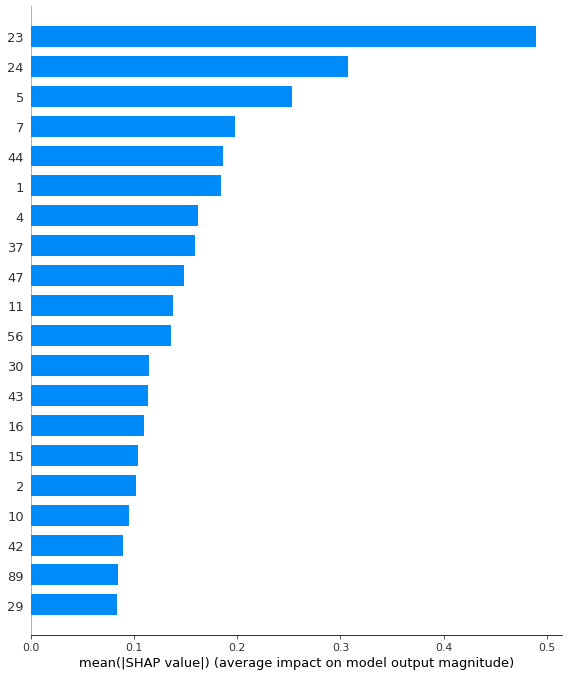

In [ ]:
masker = shap.maskers.Independent(data= x_test_sc)
explainer_lr = shap.LinearExplainer(lr, masker = masker)
shap_values_lr = explainer_lr.shap_values(pd.DataFrame(x_test_sc))
shap.summary_plot(shap_values_lr, pd.DataFrame(x_test_sc), plot_type='bar')

In [ ]:
dt = DecisionTreeClassifier(max_depth=15)
dt.fit(x_train_sc,y_train)

DecisionTreeClassifier(max_depth=15)

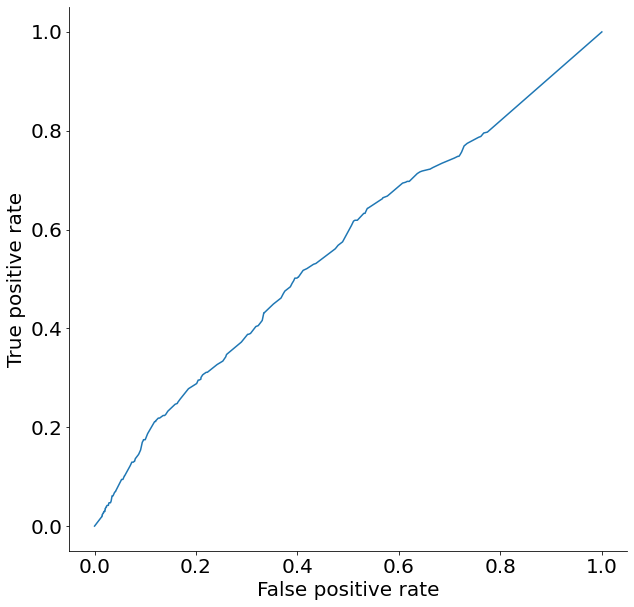

In [ ]:
from sklearn.metrics import roc_curve
dt_prob = dt.predict_proba(x_test_sc)[:,1]

# roc curve for models
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, dt_prob, pos_label=1)


# roc curve 
plt.figure(figsize=(10, 10))
plt.plot(fpr_dt,tpr_dt)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

In [ ]:
dt_prd = np.where(dt.predict_proba(x_test_sc)[:,1]>=thresh_dt[np.argmax(tpr_dt-fpr_dt)],1,0)
dt_prd = dt.predict(pd.DataFrame(pd.DataFrame(x_test_sc,columns = X_test.columns)))
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dt_prd, name = 'Predict'), margins = True)

X has feature names, but DecisionTreeClassifier was fitted without feature names


Predict,0,1,All
Actual,,,
0,1518,29,1547
1,68,0,68
All,1586,29,1615


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dt_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, dt_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, dt_prd)))
print("F1-score is {0:.2f}".format(f1_score(y_test, dt_prd)))
print("ROC/AUC is {0:.2f}".format(roc_auc_score(y_test, dt_prd)))

Accuracy is 0.94
Precision is 0.07
Recall is 0.02
F1-score is 0.04
ROC/AUC is 0.50


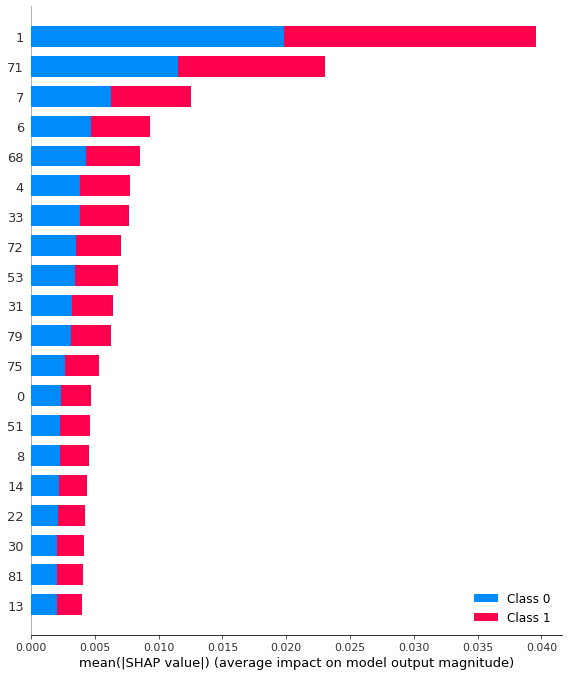

In [ ]:
explainer_dt = shap.TreeExplainer(dt)
shap_values_dt = explainer_dt.shap_values(pd.DataFrame(x_train_pca))
shap.summary_plot(shap_values_dt, pd.DataFrame(x_train_pca), plot_type='bar')

In [ ]:
rf = RandomForestClassifier(max_depth=69)
rf.fit(x_train_sc,y_train)

RandomForestClassifier(max_depth=69)

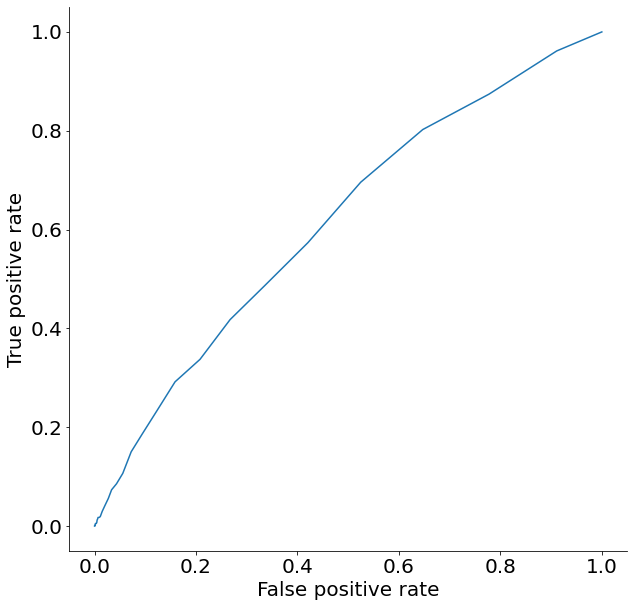

In [ ]:
from sklearn.metrics import roc_curve
rf_prob = rf.predict_proba(x_test_sc)[:,1]

# roc curve for models
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_prob, pos_label=1)


# roc curve 
plt.figure(figsize=(10, 10))
plt.plot(fpr_rf,tpr_rf)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

In [ ]:
rf_prd = np.where(rf.predict_proba(x_test_sc)[:,1]>=thresh_rf[np.argmax(tpr_rf-fpr_rf)],1,0)
#rf_prd = rf.predict(pd.DataFrame(x_test_sc))
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rf_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,716,831,1547
1,36,32,68
All,752,863,1615


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rf_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rf_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rf_prd)))
print("F1-score is {0:.2f}".format(f1_score(y_test, rf_prd)))
print("ROC/AUC is {0:.2f}".format(roc_auc_score(y_test, rf_prd)))

Accuracy is 0.49
Precision is 0.06
Recall is 0.70
F1-score is 0.11
ROC/AUC is 0.59


In [ ]:
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(x_smote)
shap.summary_plot(shap_values_rf, x_test_sc, plot_type='bar')

In [ ]:
xgb_clf = XGBClassifier(max_depth = 8, subsample = 0.5,  random_state = 42)
xgb_clf.fit(x_train_sc,y_train)

XGBClassifier(max_depth=8, random_state=42, subsample=0.5)

In [ ]:
y_test

48030    0
77254    0
78264    0
95560    0
22501    0
        ..
64348    0
50092    0
22825    0
25301    0
52603    0
Name: readmission, Length: 12998, dtype: int64

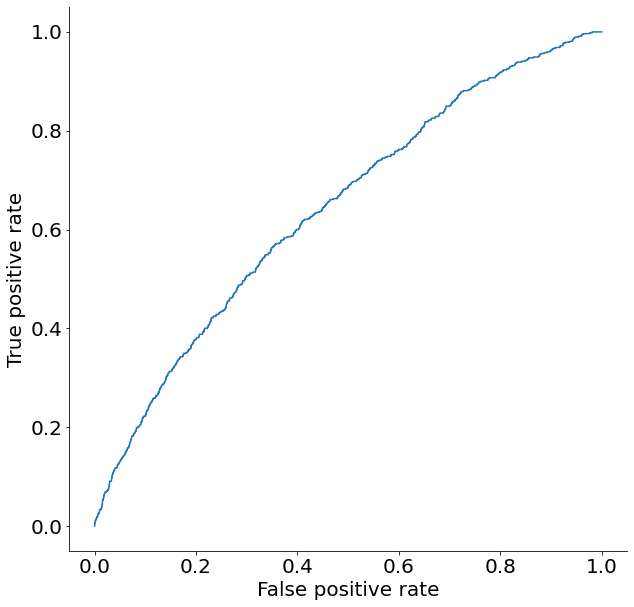

In [ ]:
from sklearn.metrics import roc_curve
xgb_prob = xgb_clf.predict_proba(x_test_sc)[:,1]

# roc curve for models
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, xgb_prob, pos_label=1)


# roc curve 
plt.figure(figsize=(10, 10))
plt.plot(fpr_xgb,tpr_xgb)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

In [ ]:
xgb_prd = np.where(xgb_clf.predict_proba(x_test_sc)[:,1]>=thresh_xgb[np.argmax(tpr_xgb-fpr_xgb)],1,0)
#xgb_prd = xgb_clf.predict(pd.DataFrame(x_test_sc))
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(xgb_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,961,586,1547
1,47,21,68
All,1008,607,1615


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, xgb_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, xgb_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, xgb_prd)))
print("F1-score is {0:.2f}".format(f1_score(y_test, xgb_prd)))
print("ROC/AUC is {0:.2f}".format(roc_auc_score(y_test, xgb_prd)))

Accuracy is 0.64
Precision is 0.07
Recall is 0.57
F1-score is 0.12
ROC/AUC is 0.61


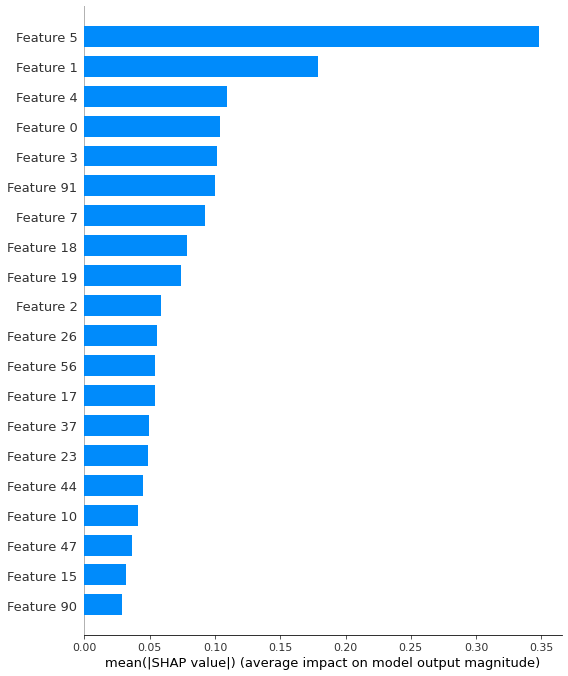

In [ ]:
explainer_xgb = shap.TreeExplainer(xgb_clf)
shap_values_xgb = explainer_xgb.shap_values(x_smote)
shap.summary_plot(shap_values_xgb, x_smote, plot_type='bar')

In [ ]:
lgb_clf = LGBMClassifier(learning_rate=0.15,max_depth=20,random_state=69)
lgb_clf.fit(x_smote,y_smote)

LGBMClassifier(learning_rate=0.15, max_depth=20, random_state=69)

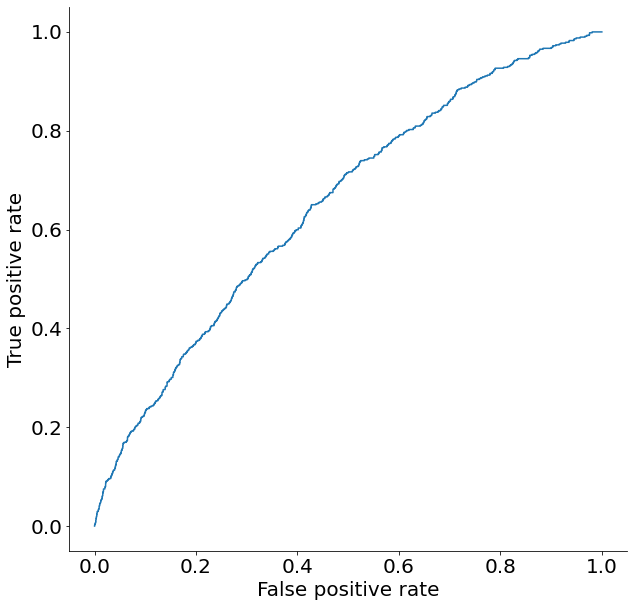

In [ ]:
from sklearn.metrics import roc_curve
lgb_prob = lgb_clf.predict_proba(pd.DataFrame(x_test_sc))[:,1]

# roc curve for models
fpr_lgb, tpr_lgb, thresh_lgb = roc_curve(y_test, lgb_prob, pos_label=1)


# roc curve 
plt.figure(figsize=(10, 10))
plt.plot(fpr_lgb,tpr_lgb)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

In [ ]:
lgb_prd = np.where(lgb_clf.predict_proba(x_test_sc)[:,1]>=thresh_lgb[np.argmax(tpr_lgb-fpr_lgb)],1,0)
#lgb_prd = lgb_clf.predict(pd.DataFrame(x_test_sc))
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(lgb_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,838,709,1547
1,38,30,68
All,876,739,1615


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, lgb_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, lgb_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, lgb_prd)))
print("F1-score is {0:.2f}".format(f1_score(y_test, lgb_prd)))
print("ROC/AUC is {0:.2f}".format(roc_auc_score(y_test, lgb_prd)))

Accuracy is 0.58
Precision is 0.07
Recall is 0.65
F1-score is 0.12
ROC/AUC is 0.61


In [ ]:
explainer_lgb = shap.TreeExplainer(lgb_clf)
shap_values_lgb = explainer_lgb.shap_values(x_smote)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


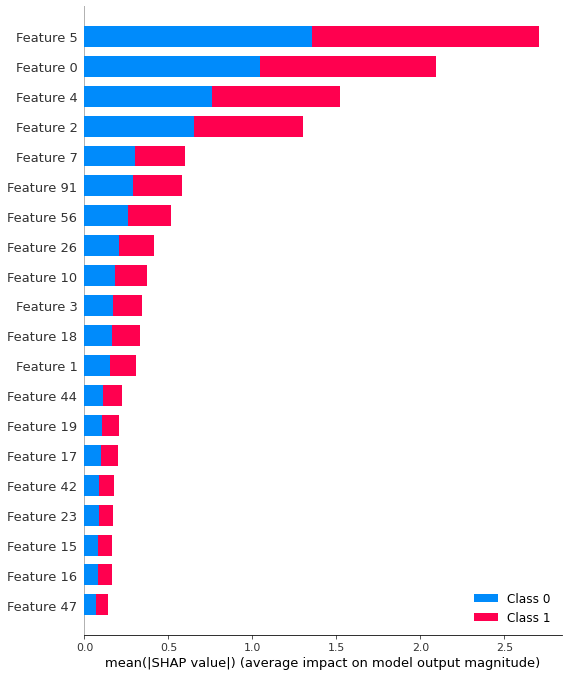

In [ ]:
shap.summary_plot(shap_values_lgb, x_smote, plot_type='bar')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics

model_2 = Sequential()
model_2.add(Dense(128, input_dim=98, activation='relu'))
model_2.add(Dropout(.3))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(.3))
model_2.add(Dense(64, activation='relu'))

model_2.add(Dense(1, activation='sigmoid')) 
                                            
# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the NN to the Training set
model_2.fit(x_smote, y_smote, 
               epochs = 10, validation_split=0.25)

Epoch 1/10
2327/2327 [==============================] - 10s 4ms/step - loss: 0.5536 - accuracy: 0.7035 - val_loss: 0.6565 - val_accuracy: 0.6561
Epoch 2/10
2327/2327 [==============================] - 7s 3ms/step - loss: 0.4852 - accuracy: 0.7581 - val_loss: 0.4616 - val_accuracy: 0.7934
Epoch 3/10
2327/2327 [==============================] - 7s 3ms/step - loss: 0.4400 - accuracy: 0.7899 - val_loss: 0.3468 - val_accuracy: 0.8769
Epoch 4/10
2327/2327 [==============================] - 7s 3ms/step - loss: 0.4082 - accuracy: 0.8104 - val_loss: 0.3143 - val_accuracy: 0.8936
Epoch 5/10
2327/2327 [==============================] - 7s 3ms/step - loss: 0.3853 - accuracy: 0.8225 - val_loss: 0.2997 - val_accuracy: 0.9041
Epoch 6/10
2327/2327 [==============================] - 7s 3ms/step - loss: 0.3676 - accuracy: 0.8337 - val_loss: 0.2194 - val_accuracy: 0.9527
Epoch 7/10
2327/2327 [==============================] - 7s 3ms/step - loss: 0.3506 - accuracy: 0.8418 - val_loss: 0.1994 - val_accuracy

In [ ]:
nn_prd = model_2.predict(pd.DataFrame(x_test_sc))
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series([i[0] for i in nn_prd], name = 'Predict'), margins = True)

407/407 [==============================] - 1s 1ms/step


Predict,0.9999999403953552,All
Actual,,
0,1547,1547
1,68,68
All,1615,1615


In [ ]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [ ]:
print(nn_prd)

[[0.99999994]
 [0.99999994]
 [0.99999994]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
